In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import matplotlib.colors as mcolors

def load_time_curve(snr=None, th_acc=None, show_acc_range=False, show_out60sec=False):
    print("\n-----------Loading SNR{}dB-------------".format(snr))

    # ## New training results
    if snr == 35 or snr == 30:
        path1 = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_poly_ray_SDR_normAll_nosnrclf_bn_dup/snr"+str(snr)+"/plot/time_curve/"
    else:
        path1 = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_poly_ray_SDR_normAll_nosnrclf_bn_dup/snr"+str(snr)+"/plot/time_curve/"
    
    # ## deg9_mem7
    # if snr == 35 or snr == 30:
    #     path1 = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_poly_ray_SDR_normAll_nosnrclf_bn_dup_poly_deg9_mem7/snr"+str(snr)+"/seed0/time_curve/"
    # else:
    #     path1 = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_poly_ray_SDR_normAll_nosnrclf_bn_dup_poly_deg9_mem7/snr"+str(snr)+"/seed0/time_curve/"


    paths = [path1]
    files = [os.listdir(p) for p in paths]
    for i in range(len(files)):
        print("files{} len:{}".format(i, len(files[i])))

    cnt=0
    acc_range=[(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1.01)]
    cnt_range=[[] for _ in range(len(acc_range))]

    timer_curve_all={}
    for idx in range(len(paths)):
        path = paths[idx]
        filelist = files[idx]
        for file in filelist:
            if file.split('.')[-1] == 'npy' and len(file.split("_"))==3:
                rfflabel = int(file.split('_')[-1].split('.')[0])
                dict_load = np.load(path+file, allow_pickle=True).item()
                val_acc = dict_load[rfflabel][-1][-1]
                if rfflabel not in timer_curve_all.keys():
                    for i in range(len(acc_range)):
                        (x,y) = acc_range[i]
                        if x<=val_acc<y :
                            cnt_range[i].append(rfflabel)
                            cnt+=1
                    if th_acc[0]<=val_acc<th_acc[1]: 
                        timer_curve_all.update(dict_load)
                else:
                    max_time_pre = timer_curve_all[rfflabel][-2][-1]
                    val_acc = dict_load[rfflabel][-1][-1]
                    max_time = dict_load[rfflabel][-2][-1]
                    if max_time<=max_time_pre:
                        timer_curve_all.update(dict_load)
                        for i in range(len(acc_range)):
                            if rfflabel in cnt_range[i]:
                                cnt_range[i].remove(rfflabel)
                        for i in range(len(acc_range)):
                            (x,y) = acc_range[i]
                            if x<=val_acc<y:
                                cnt_range[i].append(rfflabel)
                                
    print("#cnt_range:", cnt)
    if show_acc_range:
        for i in range(len(acc_range)):
            print("acc_range:{}, cnt:{}".format(acc_range[i], len(cnt_range[i])))

    rfflabels = list(timer_curve_all.keys())
    print("#{} rfflabels in time_curve_all: {}".format(len(rfflabels), rfflabels))
    print("#miss rfflabel:", 219-len(rfflabels), end=' ')
    for i in range(1, 220):
        if i not in rfflabels:
            print(i, end=', ')

    in60sec=[]
    out60sec=[]
    n_epochs=[]
    for rff in timer_curve_all.keys():
        test_time = timer_curve_all[rff][-2][-1]
        val_acc = timer_curve_all[rff][-1][-1]
        n_epochs.append(len(timer_curve_all[rff][0]))
        if test_time<=60:# and val_acc>=0.9:
            in60sec.append(rff)
        else:
            out60sec.append(rff)

    print("average n_epochs: {}".format(sum(n_epochs)/len(n_epochs)))
    print("{} rffs achive >={} within 60 sec: {}".format(len(in60sec), th_acc, in60sec))
    print("{} rffs achive >={} beyond 60 sec: {}".format(len(out60sec), th_acc, out60sec))

    if show_out60sec:
        for rff in out60sec:
            n_epoch = len(timer_curve_all[rff][-2])
            secs = timer_curve_all[rff][-2][-1]
            val_acc = timer_curve_all[rff][-1][-1]
            print("rff {} uses {} epochs, {} secs, achieving val_acc {}".format(rff, n_epoch, secs, val_acc))

    return timer_curve_all, acc_range, in60sec, out60sec

[]

-----------Loading SNR35dB-------------
files0 len:12
#cnt_range: 11
#11 rfflabels in time_curve_all: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
#miss rfflabel: 208 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196

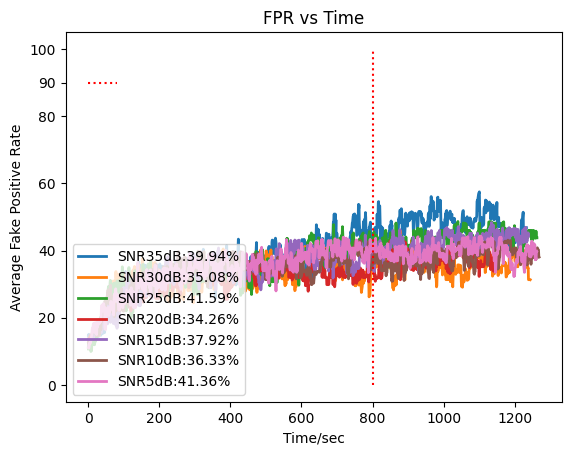

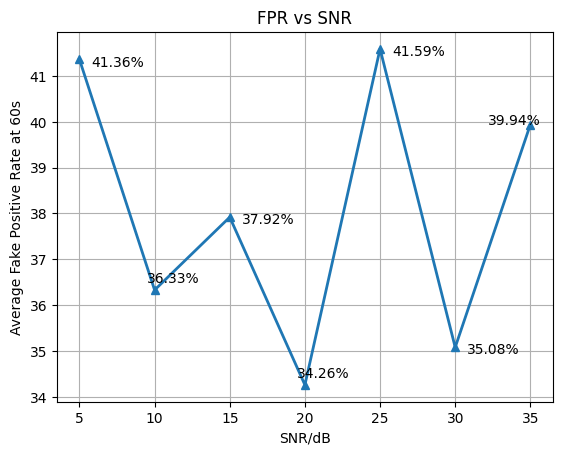

In [5]:
## Plot tranfer results
def plot_timer_all(timer_curve_all_SNRs, transfer=False, snr_preset=None, in60sec_all_SNRs=None, out60sec_all_SNRs=None, SNRs=None, colors=None, linetypes=None, marks=None):
    print(colors)
    print(linetypes)
    print(marks)
    fig, ax = plt.subplots()
    # ax_zoom = plt.axes([.50, .33, .38, .40])
    yticks_zoom=[]
    acc60all=[]
    for SNR in SNRs:
        print("\n---------------Plot SNR{}dB----------------".format(SNR))
        timer_curve_all = timer_curve_all_SNRs[SNR]
        train_step_avg=[]
        test_step_avg=[]
        train_time_1stepoch=[]
        test_time_1stepoch=[]
        train_acc_avg=[]
        test_acc_avg=[]
        max_len=0
        for rfflabel in timer_curve_all.keys():
            if snr_preset and SNR not in snr_preset and rfflabel not in in60sec_all_SNRs:
                continue
            train_time_step, train_time, train_acc_fake_curve, test_time_step, test_time, val_acc_fake_curve = timer_curve_all[rfflabel]
            max_len = max(max_len, len(train_time_step))
            train_time_1stepoch.append(train_time_step[0])
            test_time_1stepoch.append(test_time_step[0])
            train_step_avg.append(np.mean(train_time_step[1:]))
            test_step_avg.append(np.mean(test_time_step[1:]))
            # print("rfflabel:{}, train/1st epoch time:{}, train/avg time step:{}, test/1st epoch time:{}, test/avg time step:{}".format(
            #     rfflabel, train_time_1stepoch[-1], train_step_avg[-1], test_time_1stepoch[-1], test_step_avg[-1]))

        train_time_1stepoch_avg = np.mean(train_time_1stepoch)
        test_time_1stepoch_avg = np.mean(test_time_1stepoch)
        train_step_avg = np.mean(train_step_avg)
        test_step_avg = np.mean(test_step_avg)
        train_time_curve = [train_time_1stepoch_avg]
        test_time_curve = [test_time_1stepoch_avg]
        print("train/avg 1st epoch time:{}, train/avg time step:{}, test/avg 1st epoch time:{}, test/avg time step:{}".format(
                train_time_1stepoch_avg, train_step_avg, test_time_1stepoch_avg, test_step_avg))

        for i in range(1, max_len - len(train_time_curve)+1):
            train_time_curve.append(train_time_curve[-1]+train_step_avg)

        for i in range(1, max_len - len(test_time_curve)+1):
            test_time_curve.append(test_time_curve[-1]+test_step_avg)

        for rfflabel in timer_curve_all.keys():
            if snr_preset and SNR!=snr_preset and rfflabel not in in60sec_all_SNRs:
                continue
            train_time_step, train_time, train_acc_fake_curve, test_time_step, test_time, val_acc_fake_curve = timer_curve_all[rfflabel]
            if val_acc_fake_curve[-1]==0:
                continue
            train_acc_fake_curve += [train_acc_fake_curve[-1] for i in range(1, max_len - len(train_acc_fake_curve)+1)]
            val_acc_fake_curve += [val_acc_fake_curve[-1] for i in range(1, max_len - len(val_acc_fake_curve)+1)]
            if train_acc_avg == []:
                train_acc_avg=train_acc_fake_curve
                test_acc_avg = val_acc_fake_curve
            else:
                train_acc_avg=[a+b for (a,b) in zip(train_acc_avg, train_acc_fake_curve)]
                test_acc_avg=[a+b for (a,b) in zip(test_acc_avg, val_acc_fake_curve)]
        n_labels = len(list(timer_curve_all.keys()))
        train_acc_avg = [x/n_labels for x in train_acc_avg]
        test_acc_avg = [x/n_labels for x in test_acc_avg]

        stamp=800
        train_acc60, test_acc60 = 0, 0
        train_acc60_t, test_acc_60_t = 0, 0
        train_epoch, test_epoch = 0, 0
        for i in range(len(train_time_curve)):
            if 0<=stamp-train_time_curve[i]<1: # <0.15 when testing with tranfer learning results
            # if np.abs(train_time_curve[i]-60)<1:
                train_acc60 = max(train_acc60, train_acc_avg[i])
                train_acc60_t = train_time_curve[i]
                train_epoch = i
            if 0<=stamp-test_time_curve[i]<1:
            # if np.abs(test_time_curve[i]-60)<1e-1:
                test_acc60 = max(test_acc60, test_acc_avg[i])
                test_acc_60_t = test_time_curve[i]
                test_epoch = i

        max_train_time = train_time_curve[-1]
        max_test_time = test_time_curve[-1]
        train_acc60, test_acc60 = np.round(train_acc60, 4), np.round(test_acc60, 4)
        train_acc60_t, test_acc_60_t = np.round(train_acc60_t, 4), np.round(test_acc_60_t, 4)
        acc60all.append(100*test_acc60)
        print("train_acc60:{}, time:{}, epoch:{}; test_acc60:{}, time:{}, epoch:{}".format(train_acc60, train_acc60_t, train_epoch, test_acc60, test_acc_60_t, test_epoch))
        print("max_avg train_acc:{}, test_acc:{}".format(max(train_acc_avg), max(test_acc_avg)))
        print("train time last:{}, test time last:{}".format(max_train_time, max_test_time))
        df = pd.DataFrame({'train':train_acc_avg, 'test':test_acc_avg})

        ax.plot(test_time_curve[:1500], 100*df['test'][:1500], color=colors[SNR], linestyle=linetypes[1], linewidth=2.0, label='SNR{}dB:{}%'.format(SNR, np.round(100*test_acc60,2)))
        # ax.plot(test_time_curve, 100*df['test'].rolling(200).mean(), color='lightblue', linestyle=linetypes[1])
        x_zoom = test_time_curve[200:400]
        y_zoom = 100*df['test'][200:400]
        # ax_zoom.plot(x_zoom, y_zoom, color=colors[SNR], linewidth=2.0, label='SNR{}dB:{}%'.format(SNR, np.round(100*test_acc60,2)))
        # ax_zoom.hlines(y=100*test_acc60, xmin=0, xmax=max_test_time, colors=colors[SNR], linestyles='dotted')
        # yticks_zoom.append(np.round(100*test_acc60,2))
    
    # ax_zoom.set_ylim([84, 95])
    # ax_zoom.set_xlim([45, 61.5])
    # ax_zoom.set_yticks([84, 87, 88, 89, 90, 91, 92, 93, 94])
    # ax_zoom.vlines(x=60, ymin=83, ymax=95, colors='r', linestyles='dotted') 
    # ax_zoom.tick_params(axis='both', which='major', labelsize=9)
    
    ax.vlines(x=stamp, ymin=0, ymax=100, colors='r', linestyles='dotted')  
    ax.hlines(y=90, xmin=0, xmax=80, colors='r', linestyles='dotted')  
    ax.set_yticks([0, 20, 40, 60, 80, 90, 100])
    ax.set_xlabel('Time/sec')
    ax.set_ylabel('Average Fake Positive Rate')
    ax.set_title('FPR vs Time')
    ax.legend(loc='lower left')
    plt.show()

    fig1, ax1 = plt.subplots()
    ax1.plot(SNRs, acc60all, marker='^', linewidth=2.0)
    ax1.set_xticks(SNRs)
    ax1.set_xlabel('SNR/dB')
    ax1.set_ylabel('Average Fake Positive Rate at 60s')
    ax1.set_title('FPR vs SNR')
    ax1.text(x=SNRs[0]-2.8, y=acc60all[0], s='{}%'.format(np.round(acc60all[0],2))) 
    ax1.text(x=SNRs[1]+0.8, y=acc60all[1]-0.15, s='{}%'.format(np.round(acc60all[1],2)))   
    ax1.text(x=SNRs[2]+0.8, y=acc60all[2]-0.15, s='{}%'.format(np.round(acc60all[2],2)))  
    ax1.text(x=SNRs[3]-0.5, y=acc60all[3]+0.15, s='{}%'.format(np.round(acc60all[3],2)))  
    ax1.text(x=SNRs[4]+0.8, y=acc60all[4]-0.15, s='{}%'.format(np.round(acc60all[4],2))) 
    ax1.text(x=SNRs[5]-0.5, y=acc60all[5]+0.15, s='{}%'.format(np.round(acc60all[5],2))) 
    ax1.text(x=SNRs[6]+0.8, y=acc60all[6]-0.15, s='{}%'.format(np.round(acc60all[6],2))) 
    ax1.grid()
    plt.show()

timer_curve_all_SNRs = {}
in60sec_all_SNRs=[]
out60sec_all_SNRs=[]
SNRs=[35, 30, 25, 20, 15, 10, 5]
ths_acc={5:(0, 1.01), 10:(0, 1.01), 15:(0, 1.01), 20:(0., 1.01), 25:(0, 1.01), 30:(0, 1.01), 35:(0, 1.01)}
colors_list=list(mcolors.TABLEAU_COLORS)[:len(SNRs)]
# colors_list=[['blue', 'lightblue'], ['green', 'lightgreen'], ['steelblue', 'skyblue'], ['mediumorchid', 'plum'], ['crimson', 'lightpink'], ['sandybrown','peachpuff'], ['darkgoldenrod', 'gold']]
colors={}
for i in range(len(SNRs)):
    colors[SNRs[i]] = colors_list[i]
linetypes=['-.', '-']
marks=['+', '*']

snr_preset = None #[35,]
in60sec_preset=[]
out60sec_preset=[]
if snr_preset:
    for snri in range(len(snr_preset)):
        snr = snr_preset[snri]
        _, _, in60sec, out60sec = load_time_curve(snr=snr, th_acc=ths_acc[snr])
        if snri==0:
            in60sec_preset=in60sec
            out60sec_preset=out60sec
            continue
        for i in range(len(in60sec)):
            in60sec_preset = list(set(in60sec_preset) & set(in60sec))

print(in60sec_preset)    

for SNR in SNRs:
    timer_curve_all, _, in60sec, out60sec = load_time_curve(snr=SNR, th_acc=ths_acc[SNR])
    timer_curve_all_SNRs[SNR] = timer_curve_all
    in60sec_all_SNRs+=in60sec
    out60sec_all_SNRs+=out60sec
print("in60sec rffs in total:{}".format(len(in60sec_all_SNRs)))
print("out60sec rffs in total:{}".format(len(out60sec_all_SNRs)))
plot_timer_all(timer_curve_all_SNRs, False, snr_preset, in60sec_preset, out60sec_preset, SNRs, colors, linetypes, marks)